In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import re
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Train Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [2]:
data = pd.read_csv('laptop_price.csv', encoding = 'latin-1')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
# Setting the 'Ram' and 'Weight' column to int dtype by removing 'GB' and 'kg' respectively

data['Ram'] = data['Ram'].str.replace('GB','').astype('int')
data['Weight'] = data['Weight'].str.replace('kg','').astype('float')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


# 1 euro = 88 rupees

In [5]:
data['Price'] = data['Price_euros']*88
data.drop(columns=['Price_euros'],inplace=True)

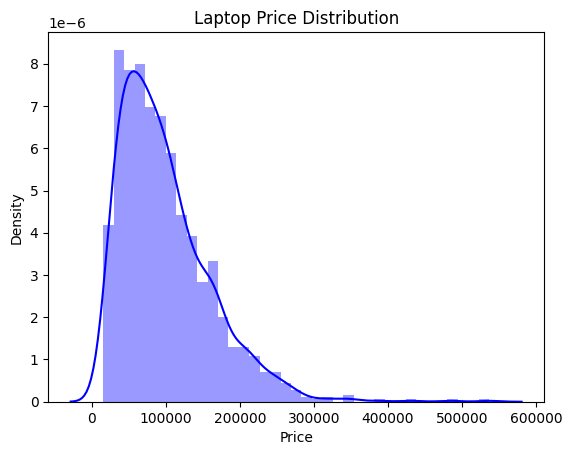

In [6]:
# Viewing the price column's distribution

sns.distplot(data['Price'],color='blue')
plt.title("Laptop Price Distribution")
plt.show()

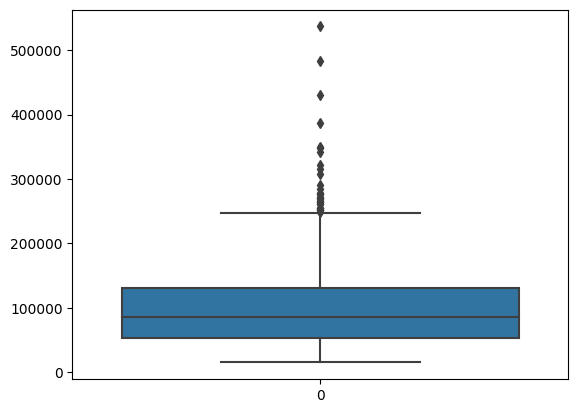

In [7]:
sns.boxplot(data['Price'])
plt.show()

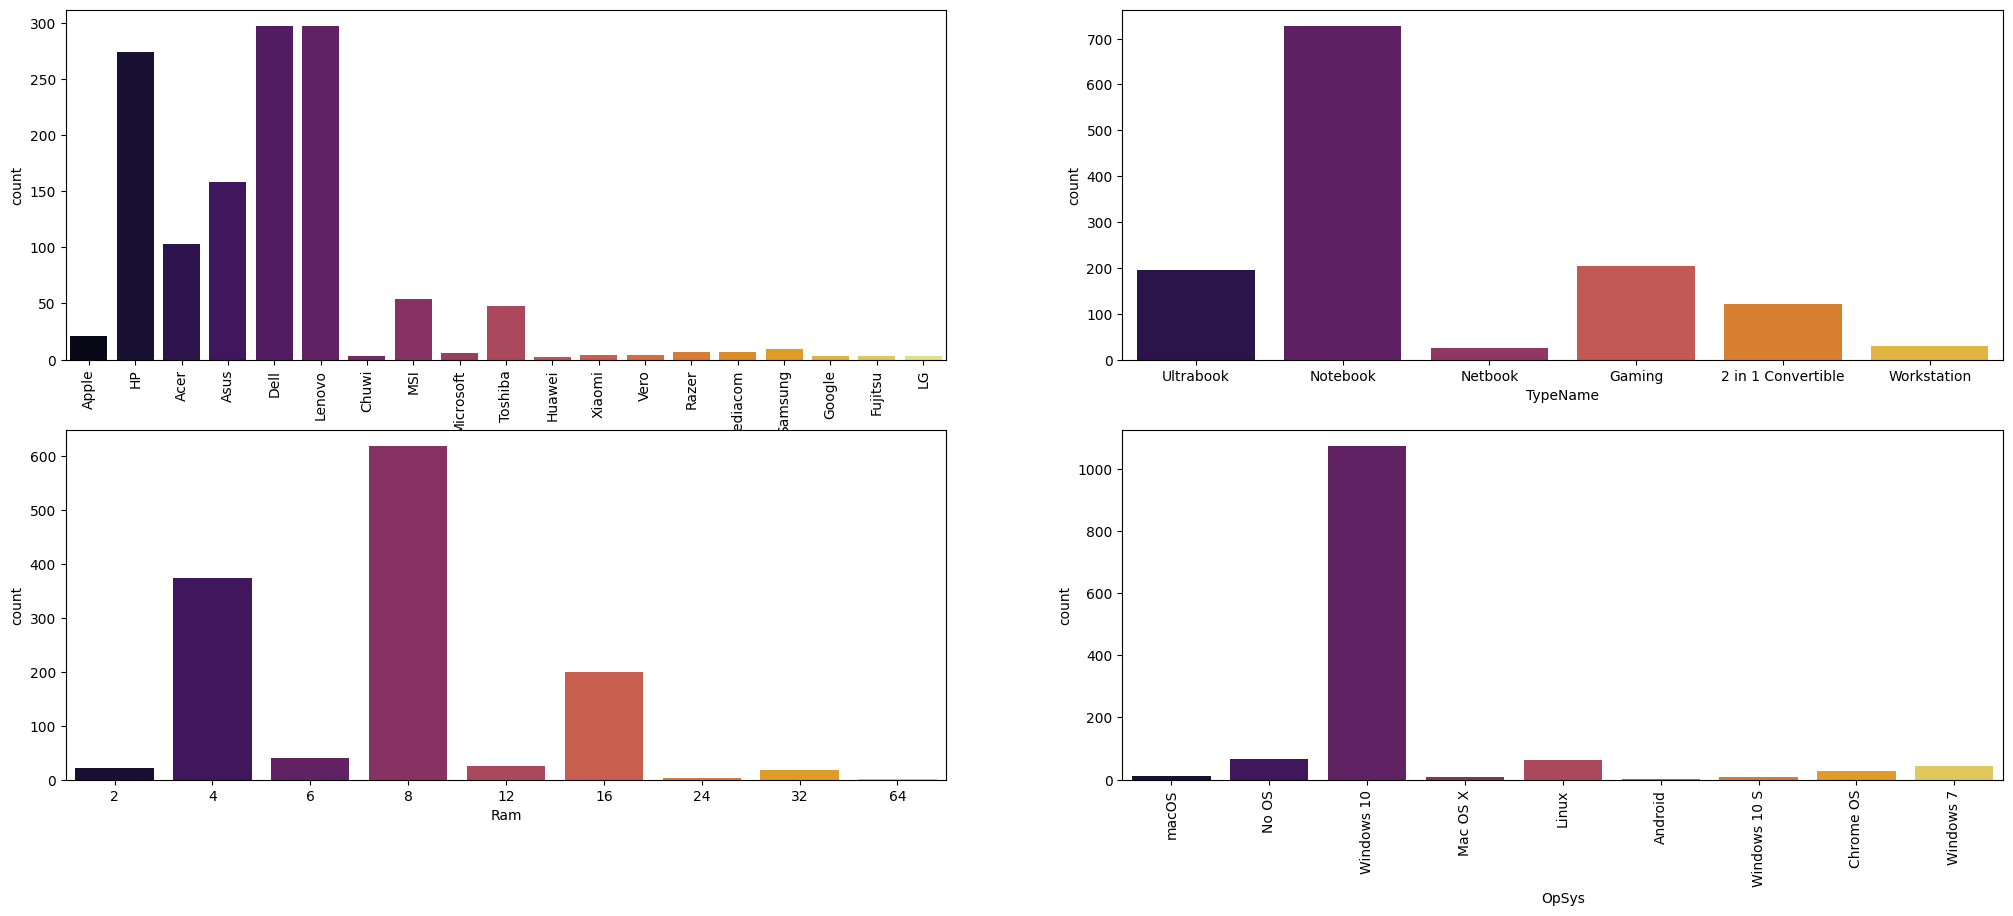

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(25, 10))

sns.countplot(ax = axes[0,0],x = data['Company'],palette='inferno')
sns.countplot(ax = axes[0,1],x = data['TypeName'],palette='inferno')
sns.countplot(ax = axes[1,0],x = data['Ram'],palette='inferno')
sns.countplot(ax = axes[1,1],x = data['OpSys'],palette='inferno')

axes[0,0].tick_params(axis='x', rotation=90)
axes[1,1].tick_params(axis='x', rotation=90)

# Dividing Screen Resolution in 2 types --> "Touch Screen", "IPS"

In [9]:
data['TouchScreen'] = data['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)
data['IPS'] = data['ScreenResolution'].apply(lambda element:1 if "IPS" in element else 0)

<AxesSubplot:xlabel='IPS', ylabel='Price'>

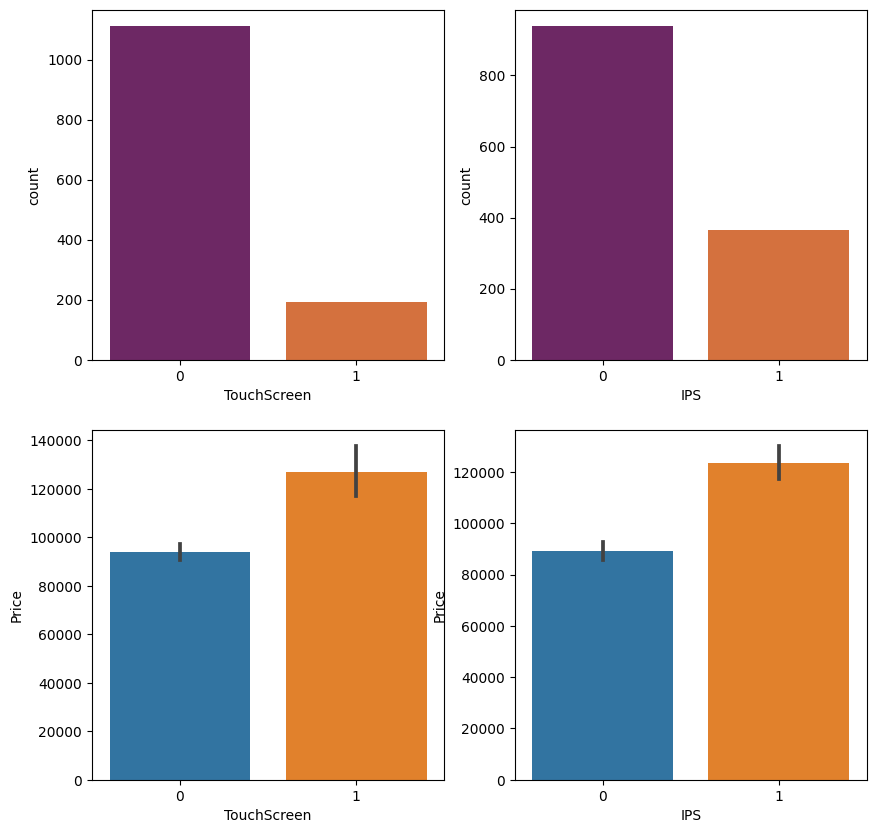

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot(ax = axes[0,0],x = data['TouchScreen'],palette='inferno')
sns.countplot(ax = axes[0,1],x = data['IPS'],palette='inferno')
sns.barplot(ax = axes[1,0],x = data['TouchScreen'],y = data['Price'])
sns.barplot(ax = axes[1,1],x = data['IPS'],y = data['Price'])

# axes[0,0].tick_params(axis='x', rotation=90)
# axes[0,1].tick_params(axis='x', rotation=90)
# axes[1,0].tick_params(axis='x', rotation=90)
# axes[1,1].tick_params(axis='x', rotation=90)

# Extrating X Resolution and Y Resolution

In [11]:
data['height'] = data['ScreenResolution']
data['width'] = data['ScreenResolution']

for i in range(len(list(data['ScreenResolution']))):
    data['height'][i] = int(re.split(r"x",re.split(r"\s+", data['ScreenResolution'][i])[-1])[0])
    data['width'][i] = int(re.split(r"x",re.split(r"\s+", data['ScreenResolution'][i])[-1])[1])
    
# data['Total Pixels'] = data['height']*data['width']
data['height'] = data['height'].astype('int')
data['width'] = data['width'].astype('int')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,height,width
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,117892.72,0,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,79106.72,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,50600.00,0,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,223295.60,0,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,158716.80,0,1,2560,1600


In [12]:
data.drop(columns=['laptop_ID'],inplace=True)

<AxesSubplot:>

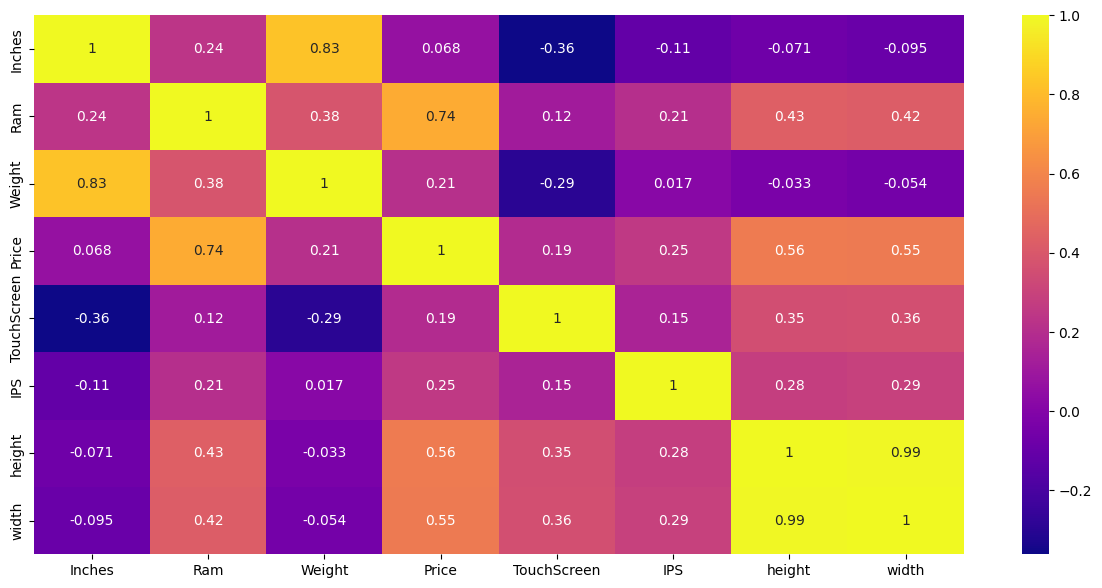

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,cmap='plasma')

As we can observe from the correlation plot that the `height and width` are having much collinearity,so why not combine them with `Inches` which is having less collinearity,so we will combine them as follows

$$
    PPI(pixels per inch) = \frac{\sqrt{height^2+width^2}}{inches}
$$

In [14]:
data['PPI'] = (((data['height']**2+data['width']**2))**0.5/data['Inches']).astype('float')

In [15]:
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
height         0.556529
width          0.552809
PPI            0.473487
Name: Price, dtype: float64

**We will use the PPI instead of inches, height, and width since the correlation data shows that it has a good correlation and because it combines three characteristics to provide results over three columns.**

In [16]:
data.drop(columns=['ScreenResolution','Inches','height','width'],inplace=True)

In [17]:
# data['screen'] = data['ScreenResolution']

# for i in range(len(data['ScreenResolution'])):
#     data['screen'][i] = re.sub("\d+x\d+", "", data['ScreenResolution'][i])

### CPU

In [18]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [19]:
data['CPU_Name'] = data['Cpu'].apply(lambda text:" ".join(text.split()[:3]))

In [20]:
data['CPU_Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

**In "CPU_Name" column there are many categories of INTEL PROCESSORS of i3, i5, i7 and other INTEL versions, also there are AMD Processors**

Lets Segregate this column in 3 categories -->
* Intel Core i7
* Intel Core i5
* Intel Core i3
* Other Intel Processor
* AMD Processor

In [21]:
def apply_processor(processor):
    if re.match(r"Intel Core i7",processor) or re.match(r"Intel Core i5",processor) or re.match(r"Intel Core i3",processor):
        return processor
    else:
        if re.search(r"Intel",processor):
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [22]:
data['CPU_Name'] = data['CPU_Name'].apply(lambda processor:apply_processor(processor))
data.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,117892.72,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,79106.72,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,50600.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,223295.60,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,158716.80,0,1,226.983005,Intel Core i5


In [23]:
data.CPU_Name.value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: CPU_Name, dtype: int64

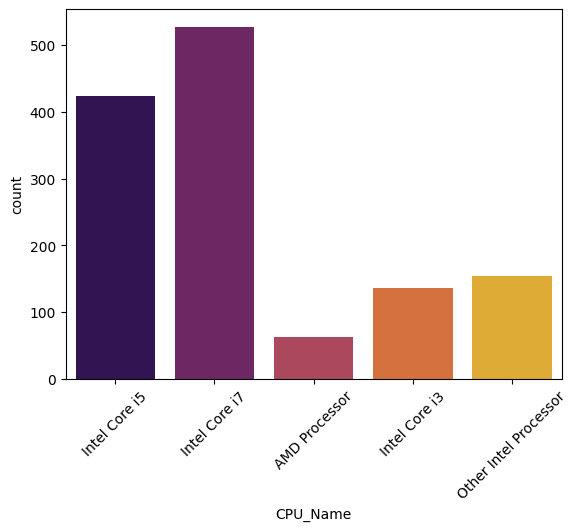

In [24]:
sns.countplot(x = data['CPU_Name'],palette='inferno')
plt.tick_params(axis='x', rotation=45)

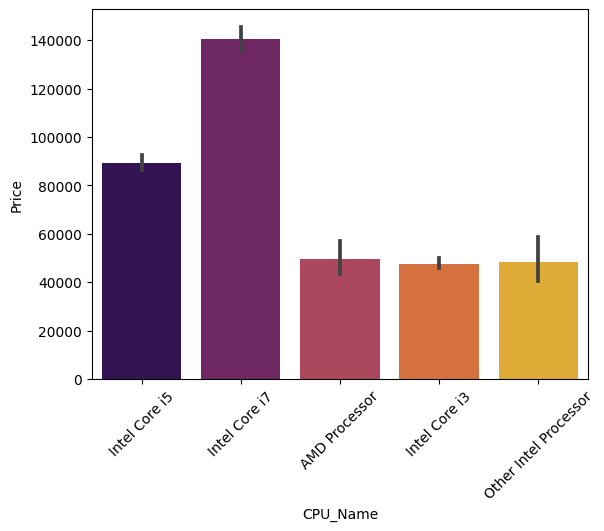

In [25]:
sns.barplot(x = data['CPU_Name'],y = data['Price'],palette='inferno')
plt.tick_params(axis='x', rotation=45)

In [26]:
data.drop(columns=['Cpu'],inplace=True)

# Separating the ***Memory's Type and Value***

--> 4 Most Common Features where observed :-
   * SSD
   * HDD
   * Flash Storage
   * Hybrid

In [27]:
data.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [28]:
# First step :- Converting all decimal value to integer value.
# Example --> Converting "1.0" decimal value in "512GB SSD +  1.0TB Hybrid" to "512GB SSD +  1TB Hybrid" 

data['Memory'] =  data['Memory'].apply(lambda x: re.sub(r"\.0","",str(x)))

In [29]:
# replacing the GB word with " "
data['Memory'] = data['Memory'].str.replace('GB','')

# replacing the TB word with "000" --> 1TB = 1000GB
data['Memory'] = data['Memory'].str.replace('TB','000')

In [30]:
# Spliting the word accross "+" sign
dup = data['Memory'].str.split("+",n = 1,expand = True)

# Creating New Column containg first part of the word --> before "+" sign
data['First Part'] = dup[0]
# Stripping off white spaces from the first part of the word
data['First Part'] = data['First Part'].str.strip()

data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,First Part
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,117892.72,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,79106.72,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,50600.00,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,223295.60,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,158716.80,0,1,226.983005,Intel Core i5,256 SSD


In [31]:
def changes1(feature):
    data['Layer1'+feature] = data['First Part'].apply(lambda x:1 if feature in x else 0)

In [32]:
list_features = ['HDD','SSD','Hybrid','FlashStorage']    
for feature in list_features:
    changes1(feature)
    
data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,First Part,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,117892.72,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,79106.72,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,50600.00,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,223295.60,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,158716.80,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [33]:
# Keeping only the integer part in "First Part" Column
data['First Part'] =  data['First Part'].apply(lambda x: re.sub(r'\D','', str(x)))
data['First Part'].value_counts()

256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: First Part, dtype: int64

In [34]:
# Creating New Column containg second part of the word --> after "+" sign
data['Second Part'] = dup[1]
data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,First Part,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second Part
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,117892.72,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,79106.72,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,50600.00,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,223295.60,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,158716.80,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [35]:
def changes2(feature):  
    data['Layer2' + feature] = data['Second Part'].apply(lambda x:1 if feature in x else 0)

In [36]:
# Filling 'Nan' vaues
data['Second Part'] = data['Second Part'].fillna("0")

for feature in list_features:
    changes2(feature)

In [37]:
# Keeping only the integer part in "Second Part" Column
data['Second Part'] =  data['Second Part'].apply(lambda x: re.sub(r'\D','', str(x)))
data['Second Part'].value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: Second Part, dtype: int64

In [38]:
data['First Part'] = data['First Part'].astype('int')
data['Second Part'] = data['Second Part'].astype('int')

In [39]:
# Calulating the value of features and storing the result in subsequent columns

data["HDD"]=(data['First Part']*data["Layer1HDD"]+data["Second Part"]*data["Layer2HDD"])
data["SSD"]=(data['First Part']*data["Layer1SSD"]+data["Second Part"]*data["Layer2SSD"])
data["Hybrid"]=(data['First Part']*data["Layer1Hybrid"]+data["Second Part"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data['First Part']*data["Layer1FlashStorage"]+data["Second Part"]*data["Layer2FlashStorage"])

In [40]:
# Dropping of newly created columns

data.drop(columns=['Memory','First Part', 'Second Part', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [41]:
data.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64

**While HDD and SDD have good correlations and  HDD has a negative relationship with price, it is true that as laptop prices rise, it is more likely that the laptop will use SDD rather than HDD and vice versa. Based on the correlation, we see that "Hybrid" and "Flash Storage" are almost negligible, so we can simply drop them off**

In [42]:
data.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)

**Since there isn't much information available about laptops, it is preferable that we concentrate on the "GPU brands" rather than the values that are present next to them**

In [43]:
data.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [44]:
# Getting first word from Gpu column as its Brand name
data['Gpu_Brandname'] =  data['Gpu'].apply(lambda x: re.split(r"\s+",str(x))[0])
data.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu_Brandname
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,117892.72,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,79106.72,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,50600.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,223295.60,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,158716.80,0,1,226.983005,Intel Core i5,0,256,Intel


In [45]:
data.Gpu_Brandname.value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brandname, dtype: int64

<AxesSubplot:xlabel='Gpu_Brandname', ylabel='Price'>

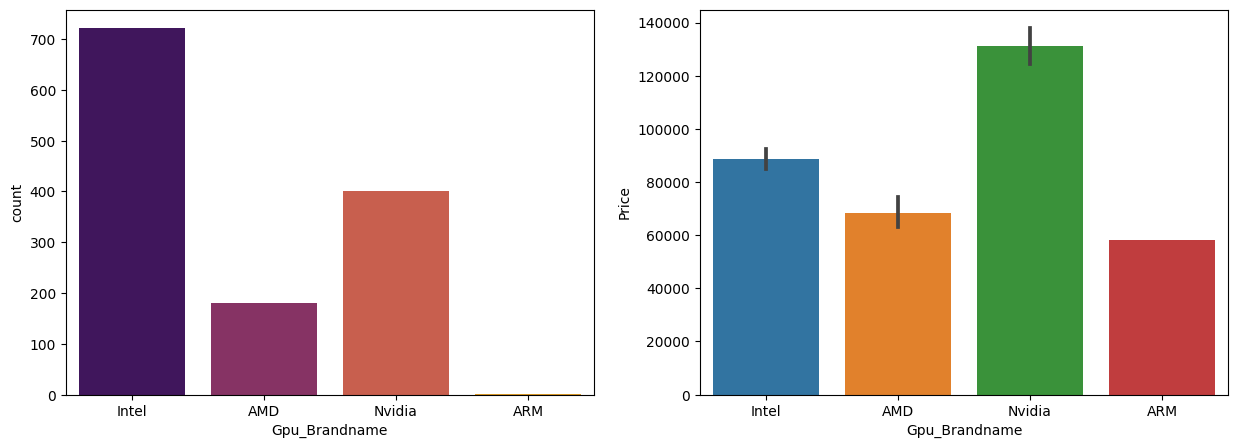

In [46]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x=data['Gpu_Brandname'],palette='inferno',ax=axes[0])
sns.barplot(x=data['Gpu_Brandname'],y=data['Price'],ax=axes[1])

In [47]:
# Removing ARM Gpu Brand 
data = data[data['Gpu_Brandname']!='ARM']

<AxesSubplot:xlabel='Gpu_Brandname', ylabel='Price'>

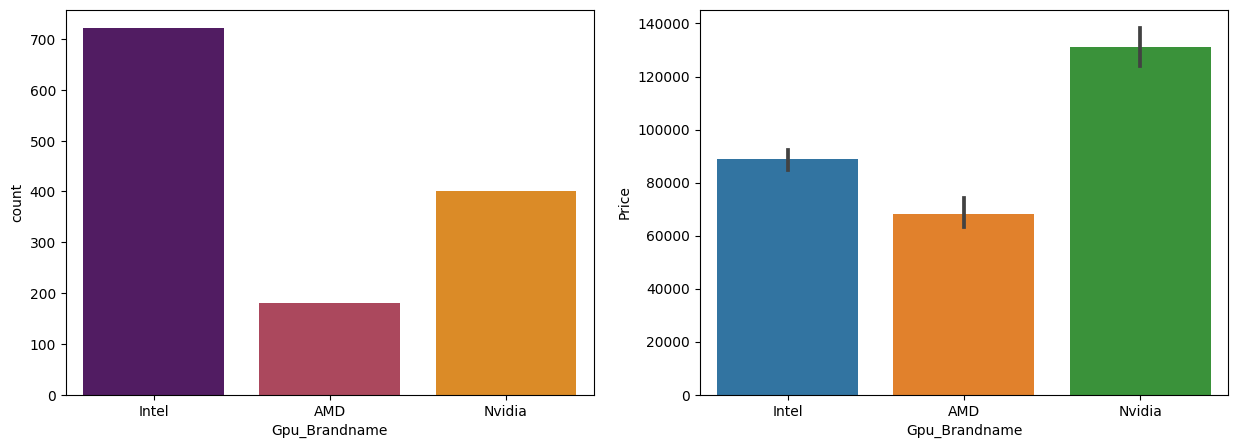

In [48]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x=data['Gpu_Brandname'],palette='inferno',ax=axes[0])
sns.barplot(x=data['Gpu_Brandname'],y=data['Price'],ax=axes[1])

In [49]:
data.drop(columns=['Gpu'],inplace=True)

# OPERATING SYSTEM

In [50]:
data.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu_Brandname
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,117892.72,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,79106.72,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,No OS,1.86,50600.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,macOS,1.83,223295.60,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,158716.80,0,1,226.983005,Intel Core i5,0,256,Intel


In [51]:
data.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [52]:
# Clubbing all windows opsys and mac opsys together 
def apply_opsys(sys):
    if re.match(r"Windows 10",sys) or re.match(r"Windows 7",sys) or re.match(r"Windows 10 S",sys):
        return 'Windows'
    elif re.match(r"Mac OS X",sys) or re.match(r"macOS",sys):
        return 'Mac'
    else:
        return 'Others'

In [53]:
data['OpSys'] = data['OpSys'].apply(lambda x:apply_opsys(x))

In [54]:
data.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu_Brandname
0,Apple,MacBook Pro,Ultrabook,8,Mac,1.37,117892.72,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,Mac,1.34,79106.72,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,Others,1.86,50600.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,Mac,1.83,223295.60,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,Mac,1.37,158716.80,0,1,226.983005,Intel Core i5,0,256,Intel


<AxesSubplot:xlabel='OpSys', ylabel='Price'>

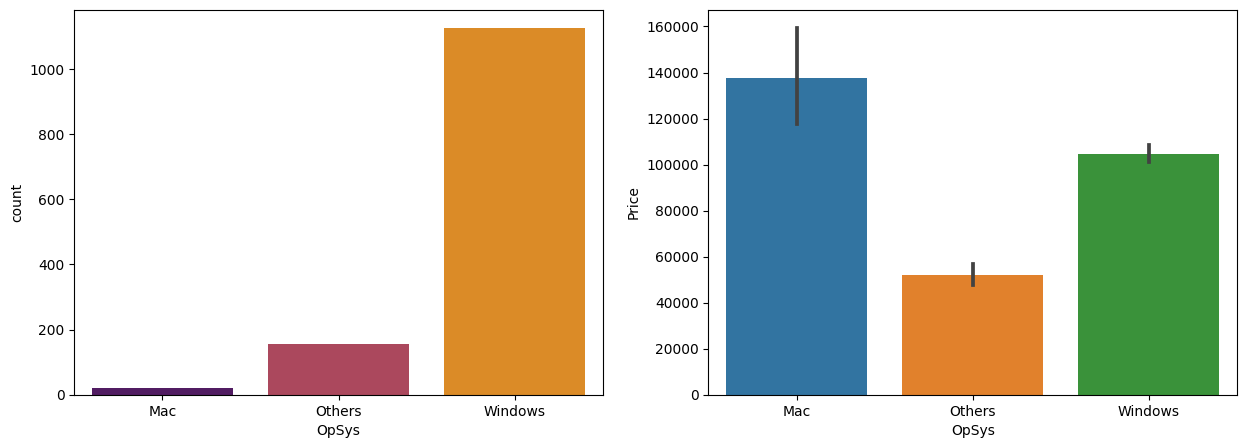

In [55]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x=data['OpSys'],palette='inferno',ax=axes[0])
sns.barplot(x=data['OpSys'],y=data['Price'],ax=axes[1])

# PRICE ANALYSIS

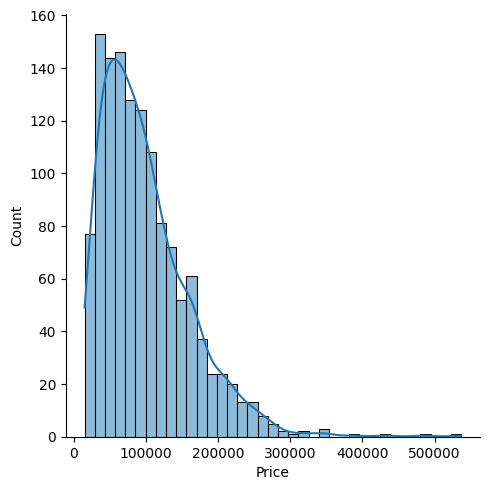

In [56]:
sns.displot(x=data['Price'],palette='inferno',kde=True)

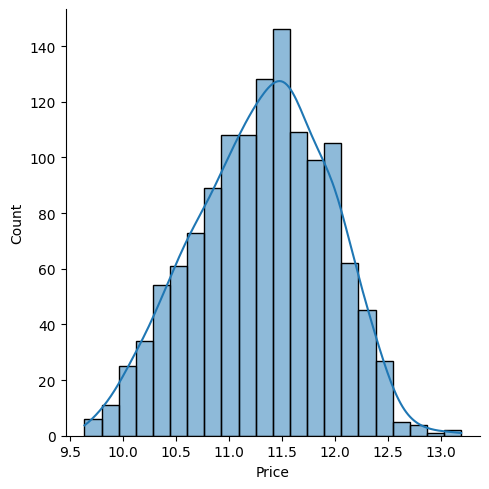

In [57]:
sns.displot(x=np.log(data['Price']),palette='inferno',kde=True)

<AxesSubplot:>

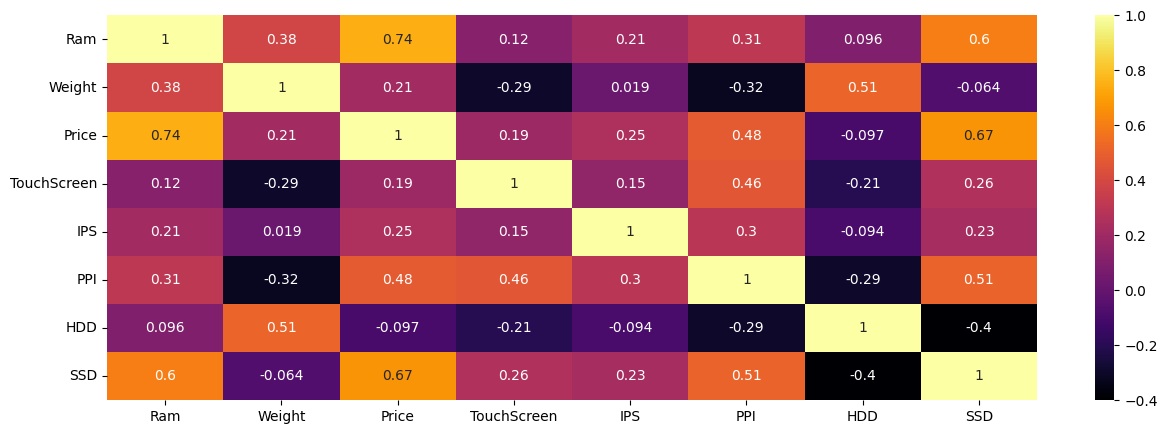

In [58]:
plt.figure(figsize= (15,5))
sns.heatmap(data.corr(),annot=True,cmap='inferno')

# Train Models

In [59]:
y = np.log(data['Price'])
X = data.drop(columns=['Price','Product'],axis = 1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [61]:
# applying one hot encoding on columns with categorical data
col_encode = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

# Linear Regression

In [62]:
model = LinearRegression()

pipe = Pipeline([('part1',col_encode),('part2',model)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score : ',round(metrics.r2_score(y_test,y_pred),2))
mae = round(metrics.mean_absolute_error(y_test,y_pred),2)
print('MAE : ',mae)
print(f'Our model pridicts +- {round(np.exp(mae),2)} more or less than the original price')

R2 score :  0.79
MAE :  0.21
Our model pridicts +- 1.23 more or less than the original price


# Ridge Regression

In [63]:
model = Ridge(alpha=10)

pipe = Pipeline([('part1',col_encode),('part2',model)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score : ',round(metrics.r2_score(y_test,y_pred),2))
mae = round(metrics.mean_absolute_error(y_test,y_pred),2)
print('MAE : ',mae)
print(f'Our model pridicts +- {round(np.exp(mae),2)} more or less than the original price')

R2 score :  0.78
MAE :  0.22
Our model pridicts +- 1.25 more or less than the original price


# Lasso Regression

In [64]:
model = Lasso(alpha=0.001)

pipe = Pipeline([('part1',col_encode),('part2',model)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score : ',round(metrics.r2_score(y_test,y_pred),2))
mae = round(metrics.mean_absolute_error(y_test,y_pred),2)
print('MAE : ',mae)
print(f'Our model pridicts +- {round(np.exp(mae),2)} more or less than the original price')

R2 score :  0.79
MAE :  0.22
Our model pridicts +- 1.25 more or less than the original price


# Decision Tree

In [65]:
model = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([('part1',col_encode),('part2',model)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score : ',round(metrics.r2_score(y_test,y_pred),2))
mae = round(metrics.mean_absolute_error(y_test,y_pred),2)
print('MAE : ',mae)
print(f'Our model pridicts +- {round(np.exp(mae),2)} more or less than the original price')

R2 score :  0.82
MAE :  0.19
Our model pridicts +- 1.21 more or less than the original price


# Random Forest Regressor

In [66]:
model = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([('part1',col_encode),('part2',model)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score : ',round(metrics.r2_score(y_test,y_pred),2))
mae = round(metrics.mean_absolute_error(y_test,y_pred),2)
print('MAE : ',mae)
print(f'Our model pridicts +- {round(np.exp(mae),2)} more or less than the original price')

R2 score :  0.85
MAE :  0.17
Our model pridicts +- 1.19 more or less than the original price


# Hyperparameter Tuning for Random Forest 

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   Product        1302 non-null   object 
 2   TypeName       1302 non-null   object 
 3   Ram            1302 non-null   int32  
 4   OpSys          1302 non-null   object 
 5   Weight         1302 non-null   float64
 6   Price          1302 non-null   float64
 7   TouchScreen    1302 non-null   int64  
 8   IPS            1302 non-null   int64  
 9   PPI            1302 non-null   float64
 10  CPU_Name       1302 non-null   object 
 11  HDD            1302 non-null   int64  
 12  SSD            1302 non-null   int64  
 13  Gpu_Brandname  1302 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 147.5+ KB


In [68]:
col_obj=[]

for col_name, col_type in zip(data.columns, data.dtypes):
    if col_type == "object" and col_name != 'Product':
        col_obj.append(col_name)
        
col_obj    

['Company', 'TypeName', 'OpSys', 'CPU_Name', 'Gpu_Brandname']

In [69]:
train = pd.get_dummies(X,columns=col_obj,drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Others,OpSys_Windows,CPU_Name_Intel Core i3,CPU_Name_Intel Core i5,CPU_Name_Intel Core i7,CPU_Name_Other Intel Processor,Gpu_Brandname_Intel,Gpu_Brandname_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [70]:
X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.15,random_state=44)
X_train.shape,X_test.shape

((1106, 38), (196, 38))

[Text(0.511095083793493, 0.9814814814814815, 'Ram <= 7.0\nsquared_error = 0.392\nsamples = 1106\nvalue = 11.318'),
 Text(0.24101577682230937, 0.9444444444444444, 'CPU_Name_Other Intel Processor <= 0.5\nsquared_error = 0.202\nsamples = 370\nvalue = 10.708'),
 Text(0.13119283199950532, 0.9074074074074074, 'CPU_Name_Intel Core i5 <= 0.5\nsquared_error = 0.139\nsamples = 258\nvalue = 10.887'),
 Text(0.08441679254116317, 0.8703703703703703, 'CPU_Name_Intel Core i7 <= 0.5\nsquared_error = 0.085\nsamples = 149\nvalue = 10.716'),
 Text(0.030963469896120414, 0.8333333333333334, 'Weight <= 1.625\nsquared_error = 0.072\nsamples = 130\nvalue = 10.661'),
 Text(0.005087979648081407, 0.7962962962962963, 'TypeName_Notebook <= 0.5\nsquared_error = 0.077\nsamples = 8\nvalue = 11.115'),
 Text(0.0028266553600452267, 0.7592592592592593, 'HDD <= 250.0\nsquared_error = 0.0\nsamples = 2\nvalue = 11.526'),
 Text(0.0016959932160271359, 0.7222222222222222, 'squared_error = 0.0\nsamples = 1\nvalue = 11.54'),
 Tex

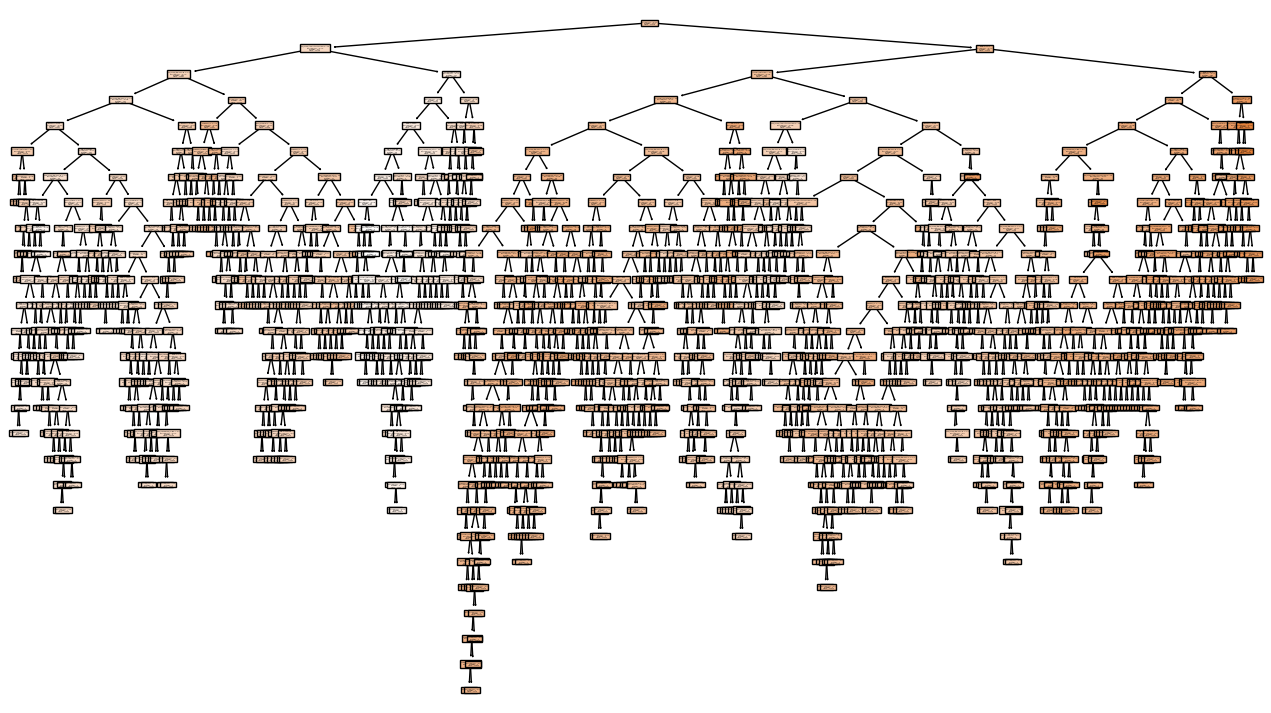

In [71]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [72]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [73]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

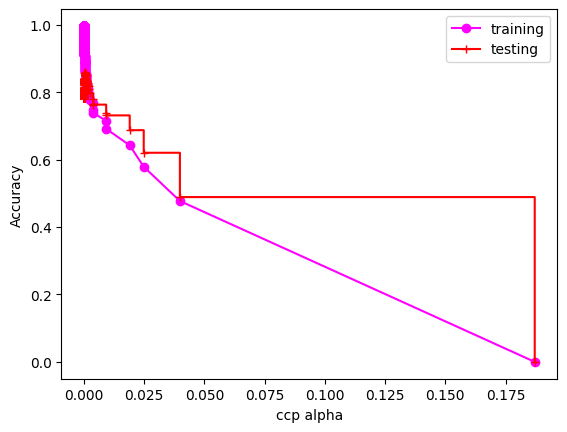

In [74]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

[Text(0.5555555555555556, 0.9, 'Ram <= 7.0\nsquared_error = 0.392\nsamples = 1106\nvalue = 11.318'),
 Text(0.3333333333333333, 0.7, 'CPU_Name_Other Intel Processor <= 0.5\nsquared_error = 0.202\nsamples = 370\nvalue = 10.708'),
 Text(0.2222222222222222, 0.5, 'CPU_Name_Intel Core i5 <= 0.5\nsquared_error = 0.139\nsamples = 258\nvalue = 10.887'),
 Text(0.1111111111111111, 0.3, 'squared_error = 0.085\nsamples = 149\nvalue = 10.716'),
 Text(0.3333333333333333, 0.3, 'squared_error = 0.118\nsamples = 109\nvalue = 11.122'),
 Text(0.4444444444444444, 0.5, 'squared_error = 0.101\nsamples = 112\nvalue = 10.294'),
 Text(0.7777777777777778, 0.7, 'Ram <= 14.0\nsquared_error = 0.206\nsamples = 736\nvalue = 11.625'),
 Text(0.6666666666666666, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.155\nsamples = 553\nvalue = 11.484'),
 Text(0.5555555555555556, 0.3, 'squared_error = 0.107\nsamples = 279\nvalue = 11.677'),
 Text(0.7777777777777778, 0.3, 'PPI <= 114.881\nsquared_error = 0.127\nsamples = 274\n

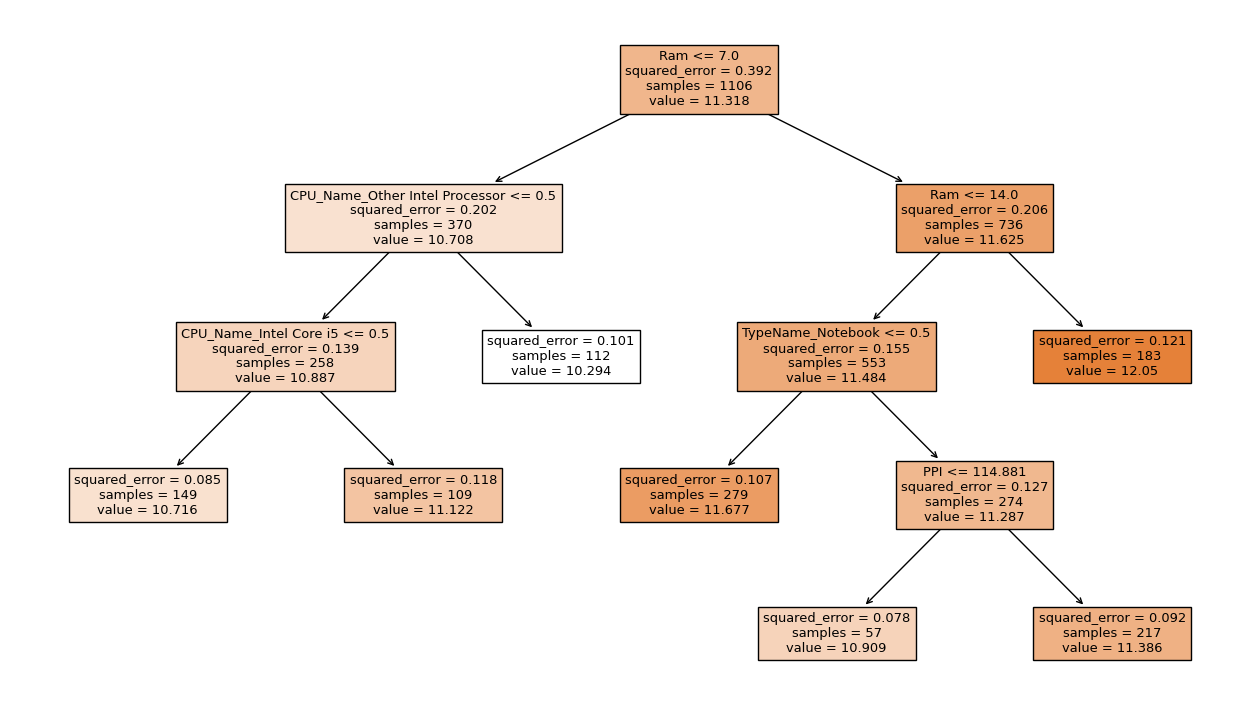

In [75]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [76]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [77]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv = 5,
                            n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   5.9s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   4.1s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   3.3s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   3.7s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   3.8s
[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=344; total time=   0.6s
[CV] END ccp_alph

In [78]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.08237037917954,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.005, criterion='mae', max_depth=15,
                        max_features='auto', min_samples_leaf=2,
                        min_samples_split=5, n_estimators=833)},
 {'model_name': 'Decision Tree',
  'best_score': -0.1098187550198888,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.005, criterion='mse', max_depth=15,
                        max_features='auto', min_samples_leaf=10,
                        min_samples_split=5)}]

# PREDICTION

In [79]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

-0.937192585245503


In [80]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))

In [81]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [82]:
data['Predicted Price'] = np.array(ans)

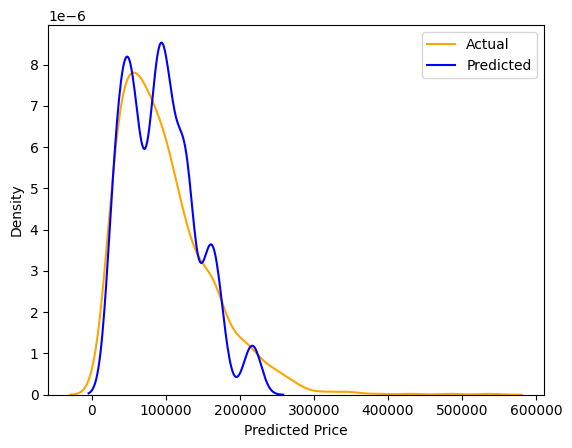

In [83]:
sns.distplot(data['Price'],hist=False,color='orange',label='Actual')
sns.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [84]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 score : 0.9000568569842251


In [85]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))

In [86]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]
data1 = data.copy()
data1['Predicted Price'] = np.array(ans)
data1

,Company,Product,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Name,HDD,SSD,Gpu_Brandname,Predicted Price
0,Apple,MacBook Pro,Ultrabook,8,Mac,1.37,117892.72,0,1,226.983005,Intel Core i5,0,128,Intel,119591.394904
1,Apple,Macbook Air,Ultrabook,8,Mac,1.34,79106.72,0,0,127.677940,Intel Core i5,0,0,Intel,87119.562803
2,HP,250 G6,Notebook,8,Others,1.86,50600.00,0,0,141.211998,Intel Core i5,0,256,Intel,62579.022923
3,Apple,MacBook Pro,Ultrabook,16,Mac,1.83,223295.60,0,1,220.534624,Intel Core i7,0,512,AMD,212664.729621
4,Apple,MacBook Pro,Ultrabook,8,Mac,1.37,158716.80,0,1,226.983005,Intel Core i5,0,256,Intel,138806.177975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4,Windows,1.80,56144.00,1,1,157.350512,Intel Core i7,0,128,Intel,59280.003187
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16,Windows,1.30,131912.00,1,1,276.053530,Intel Core i7,0,512,Intel,141575.354112
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,2,Windows,1.50,20152.00,0,0,111.935204,Other Intel Processor,0,0,Intel,20719.281337
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6,Windows,2.19,67232.00,0,0,100.454670,Intel Core i7,1000,0,AMD,64655.125872


In [87]:
%matplotlib inline

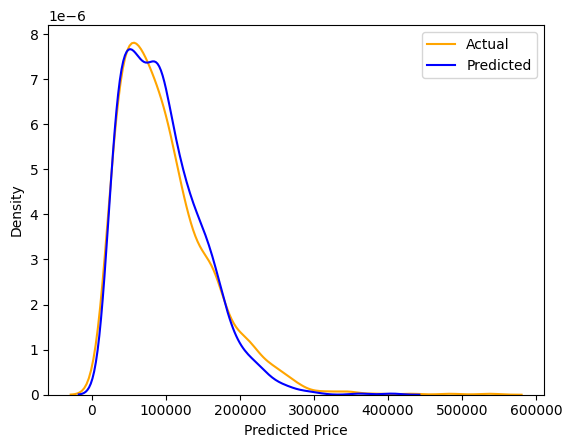

In [88]:
sns.distplot(data1['Price'],hist=False,color='orange',label='Actual')
sns.distplot(data1['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [89]:
import pickle
pickle.dump(pipe,open('pipeline_model.pkl','wb'))